## Understanding Business

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

We are trying to figure out bellow topics from the Data.
1. Which age group is vulnerable to diabetes?
2. Medical issues in males
3. Medical issues in females

## Data Gathering

In [1]:
# Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#get data
df = pd.read_csv("./diabetes_data.csv")

In [3]:
#Know your data
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Know the Data

In [4]:
#size and columns names
print("Rows: ",df.shape[0], "Columns: ",df.shape[1],"\n\n")
print("Column names",list(df.columns))

Rows:  520 Columns:  17 


Column names ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


## Understanding Data

We have data of 520 people who have diabetes and who do not have diabetes but have symptoms. We know age and gender of the paitents along with the medical issues they are facing.

### Below is the list of medical issues:
1. Polyuria: Whether the patient experienced excessive urination or not.

2. polydipisia: Whether the patient experienced excessive thirst/excess drinking or not.

3. sudden weight loss: Whether patient had an episode of sudden weight loss or not.

4. weakness: Whether patient had an episode of feeling weak.

5. polyphagia: Whether patient had an episode of excessive/extreme hunger or not.

6. genital thrush: Whether patient had a yeast infection or not.

7. visual blurring: Whether patient had an episode of blurred vision.

8. itching: Whether patient had an episode of itch.

9. irritablity: Whether patient had an episode of irritability.

10. delayed healing: Whether patient had an noticed delayed healing when wounded.

11. partial paresis: Whether patient had an episode of weakening of a muscle/group of muscles or not.

12. muscle stiffness: Whether patient had an episode of muscle stiffness.

13. alopecia: Whether patient experienced hair loss or not.

14. class: Whether patient can be considered obese or not using his body mass index.

## Data Preperation / Cleaning

### age:
We have ages to people in integer values and it is getting really difficult to analyse the data based on age. so we are diving the age into the age_groups of 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70 and 70 above 

### sort:
After dividing the age into age_groups we now sort the data on age.

In [5]:
# dividing data into age groups
df["age_group"] = pd.cut(df['age'], bins=[0,10,20,30,40,50,60,70,np.inf], labels=["0-10","10-20","20-30","30-40","41-50","51-60","61-70",">70"])

In [6]:
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,30-40
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,51-60
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,41-50
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,41-50
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,30-40
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,41-50
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,51-60
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,30-40


## Data Preparation

TO understand much better we now do the following:
1. Remove the people with no diabetes
2. Seperate the male data and female data
3. Calulate the count of people after grouping by age_group

In [7]:
# Seperating male and female data with diabetes and sorting with age
male_df = df[(df["gender"] == "Male") & (df["class"] == 1)].sort_values("age")
female_df = df[(df["gender"] == "Female") & (df["class"] == 1)].sort_values("age")

In [8]:
# Age group that is being most affected
most_affected_age = df.groupby(["gender","age_group"]).size().reset_index(name='counts')

In [9]:
most_affected_age

,gender,age_group,counts
0,Female,0-10,0
1,Female,10-20,0
2,Female,20-30,13
3,Female,30-40,61
4,Female,41-50,55
5,Female,51-60,39
6,Female,61-70,22
7,Female,>70,2
8,Male,0-10,0
9,Male,10-20,1


## Categorizing data in age groups


In [10]:
female_df = female_df.groupby("age_group").agg("mean").round(2)
male_df = male_df.groupby("age_group").agg("mean").round(2)

In [11]:
female_df

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age_group,,,,,,,,,,,,,,,,
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-30,28.75,0.50,0.25,0.42,0.42,0.42,0.00,0.50,0.17,0.08,0.42,0.67,0.58,0.08,0.00,1.0
30-40,37.05,0.84,0.85,0.64,0.75,0.56,0.04,0.55,0.55,0.31,0.56,0.69,0.49,0.04,0.05,1.0
41-50,47.29,0.65,0.71,0.73,0.78,0.84,0.04,0.59,0.43,0.25,0.49,0.82,0.47,0.04,0.20,1.0
51-60,55.84,0.75,0.72,0.84,0.50,0.62,0.19,0.66,0.53,0.22,0.50,0.75,0.44,0.00,0.41,1.0
61-70,66.10,0.95,0.67,0.38,0.71,0.71,0.24,0.71,0.67,0.43,0.52,0.48,0.29,0.33,0.19,1.0
>70,90.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.0


In [12]:
male_df

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age_group,,,,,,,,,,,,,,,,
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,16.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
20-30,27.50,1.00,1.00,0.50,0.50,0.50,1.00,0.50,0.50,0.00,1.00,0.00,0.00,0.50,0.00,1.0
30-40,36.34,0.59,0.41,0.24,0.34,0.21,0.55,0.07,0.45,0.24,0.41,0.21,0.28,0.52,0.28,1.0
41-50,45.83,0.78,0.81,0.50,0.72,0.44,0.50,0.39,0.56,0.36,0.39,0.08,0.28,0.22,0.14,1.0
51-60,55.83,0.87,0.76,0.72,0.83,0.54,0.35,0.65,0.39,0.41,0.48,0.76,0.37,0.48,0.20,1.0
61-70,64.89,0.79,0.68,0.32,0.75,0.75,0.39,0.79,0.43,0.75,0.39,0.75,0.57,0.57,0.32,1.0
>70,78.60,0.80,0.60,1.00,1.00,1.00,0.60,0.40,0.60,0.60,0.80,1.00,0.80,0.40,0.00,1.0


## Age male/female histogram

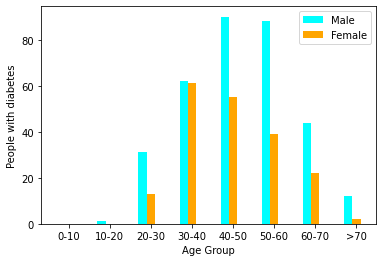

In [13]:

# create data
x = np.arange(8)
y1 = list(most_affected_age[most_affected_age["gender"]=="Male"]["counts"])
y2 = list(most_affected_age[most_affected_age["gender"]=="Female"]["counts"])
width = 0.2

plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['0-10', '10-20', '20-30', '30-40', '40-50',"50-60","60-70",">70"])
plt.xlabel("Age Group")
plt.ylabel("People with diabetes")
plt.legend(["Male", "Female"])
plt.show()

## Modeling

#### 1. Which age Group is most Vulnerable ?


By seeing into the above graph it is clear that people with age group from 30–60 are more prone to diabetes. This study was carried on the data of 520 people who have diabetes and who do not have diabetes but have symptoms of diabetes. From this, we can conclude that males are more prone to diabetes than females. Most of the females get diagnosed with diabetes in their 30’s which is not the same for males, males get diagnosed with diabetes majorly in their 40's.


In [14]:
# Analyse Female data with respect to age
corr_matrix = female_df.corr()
corr_matrix["age"].sort_values(ascending=False)

age                   1.000000
visual_blurring       0.976322
itching               0.929712
genital_thrush        0.914330
alopecia              0.864785
polydipsia            0.695476
sudden_weight_loss    0.571774
muscle_stiffness      0.513250
obesity               0.041109
irritability         -0.208608
polyuria             -0.509915
polyphagia           -0.513076
weakness             -0.602647
delayed_healing      -0.724825
partial_paresis      -0.832380
class                      NaN
Name: age, dtype: float64

In [15]:
# Analyse male data with respect to males
corr_matrix = male_df.corr()
corr_matrix["age"].sort_values(ascending=False)

age                   1.000000
muscle_stiffness      0.970631
irritability          0.927107
partial_paresis       0.923196
weakness              0.915298
itching               0.638033
visual_blurring       0.617539
alopecia              0.489091
polydipsia            0.364285
delayed_healing       0.336043
obesity               0.270544
polyphagia            0.228021
genital_thrush        0.127359
sudden_weight_loss    0.056011
polyuria             -0.389777
class                      NaN
Name: age, dtype: float64

In [16]:
male_df

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age_group,,,,,,,,,,,,,,,,
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,16.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
20-30,27.50,1.00,1.00,0.50,0.50,0.50,1.00,0.50,0.50,0.00,1.00,0.00,0.00,0.50,0.00,1.0
30-40,36.34,0.59,0.41,0.24,0.34,0.21,0.55,0.07,0.45,0.24,0.41,0.21,0.28,0.52,0.28,1.0
41-50,45.83,0.78,0.81,0.50,0.72,0.44,0.50,0.39,0.56,0.36,0.39,0.08,0.28,0.22,0.14,1.0
51-60,55.83,0.87,0.76,0.72,0.83,0.54,0.35,0.65,0.39,0.41,0.48,0.76,0.37,0.48,0.20,1.0
61-70,64.89,0.79,0.68,0.32,0.75,0.75,0.39,0.79,0.43,0.75,0.39,0.75,0.57,0.57,0.32,1.0
>70,78.60,0.80,0.60,1.00,1.00,1.00,0.60,0.40,0.60,0.60,0.80,1.00,0.80,0.40,0.00,1.0


In [24]:
male_df.drop(['gender', 'age_group'], axis=1, inplace=True)
female_df.drop(['gender', 'age_group'], axis=1, inplace=True)


In [20]:
# Normalize data
normalized_male_df=(male_df-male_df.min())/(male_df.max()-male_df.min())
normalized_female_df=(female_df-female_df.min())/(female_df.max()-female_df.min())

In [23]:
male_df

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age_group,,,,,,,,,,,,,,,,
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,16.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
20-30,27.50,1.00,1.00,0.50,0.50,0.50,1.00,0.50,0.50,0.00,1.00,0.00,0.00,0.50,0.00,1.0
30-40,36.34,0.59,0.41,0.24,0.34,0.21,0.55,0.07,0.45,0.24,0.41,0.21,0.28,0.52,0.28,1.0
41-50,45.83,0.78,0.81,0.50,0.72,0.44,0.50,0.39,0.56,0.36,0.39,0.08,0.28,0.22,0.14,1.0
51-60,55.83,0.87,0.76,0.72,0.83,0.54,0.35,0.65,0.39,0.41,0.48,0.76,0.37,0.48,0.20,1.0
61-70,64.89,0.79,0.68,0.32,0.75,0.75,0.39,0.79,0.43,0.75,0.39,0.75,0.57,0.57,0.32,1.0
>70,78.60,0.80,0.60,1.00,1.00,1.00,0.60,0.40,0.60,0.60,0.80,1.00,0.80,0.40,0.00,1.0


<AxesSubplot:title={'center':'Issues in males'}, xlabel='age_group'>

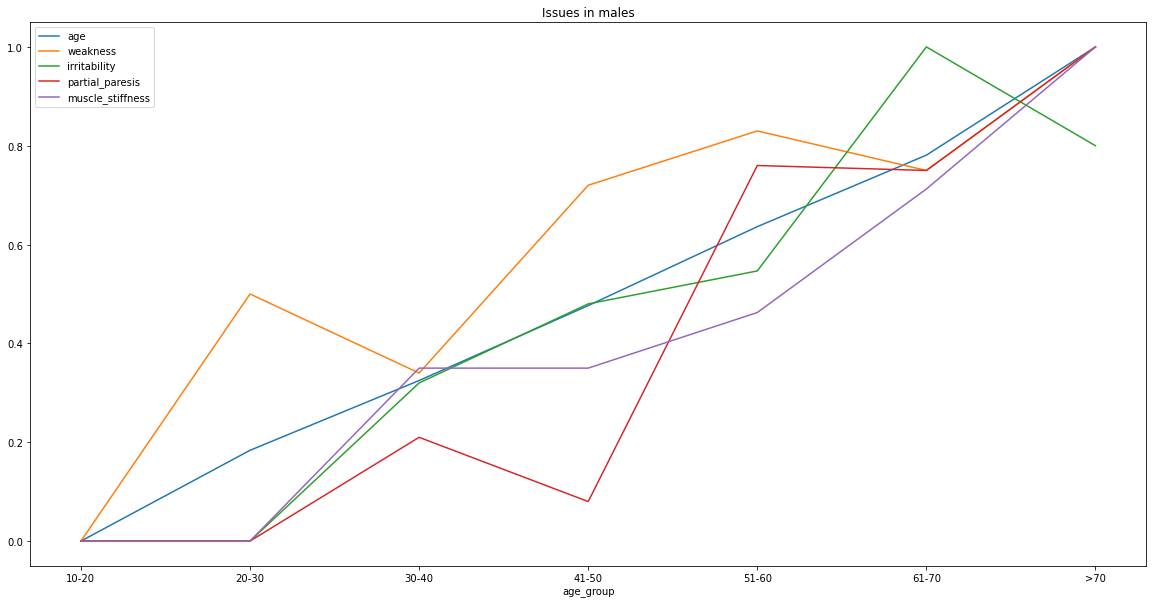

In [24]:
# Most seen issues in males vs female
normalized_male_df[["age","weakness","irritability","partial_paresis","muscle_stiffness"]].plot(figsize=(20, 10),legend=True, title="Issues in males")

<AxesSubplot:title={'center':'Issue not related to age in female'}, xlabel='age_group'>

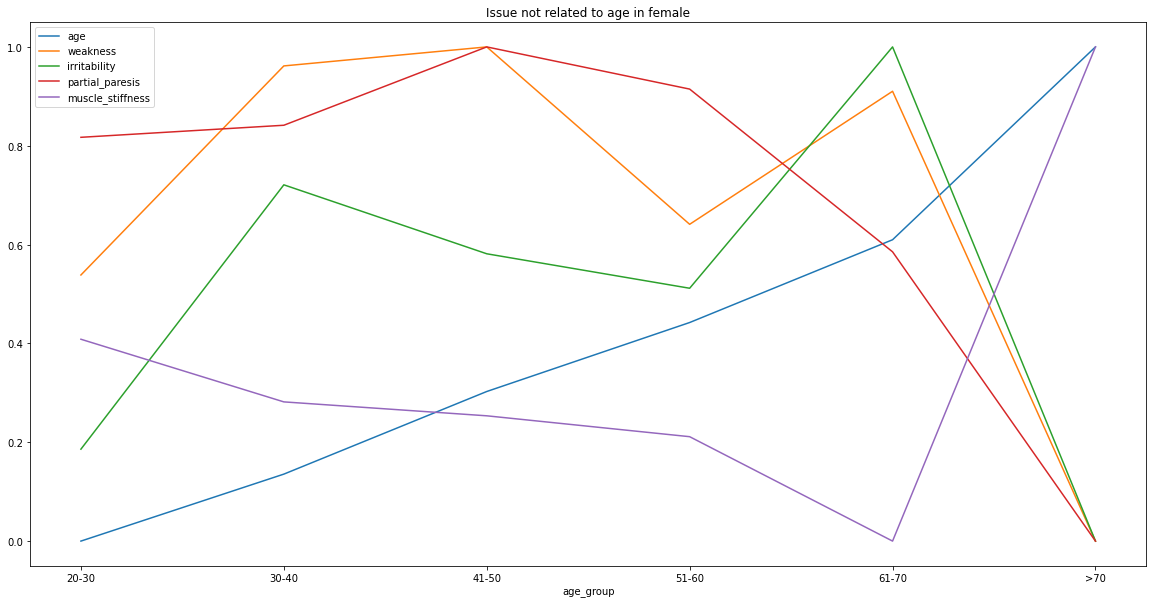

In [25]:
normalized_female_df[["age","weakness","irritability","partial_paresis","muscle_stiffness"]].plot(figsize=(20, 10),title="Issue not related to age in female")

#### 2. Which issues are common in males with respect to their age?
By further going deep into the data we found that few medical issues are directly related to the age of males. These Medical issues are:
1. Weakness
2. Irritability
3. Partial Paresis
4. Muscle Stiffness
As age increases the more people grow these medical issues. However, we saw these medical issues are not correlated to age in females. Below is the graph supporting this statement.
However, we saw these medical issues are not correlated to age in females. Below is the graph supporting this statement.

<AxesSubplot:xlabel='age_group'>

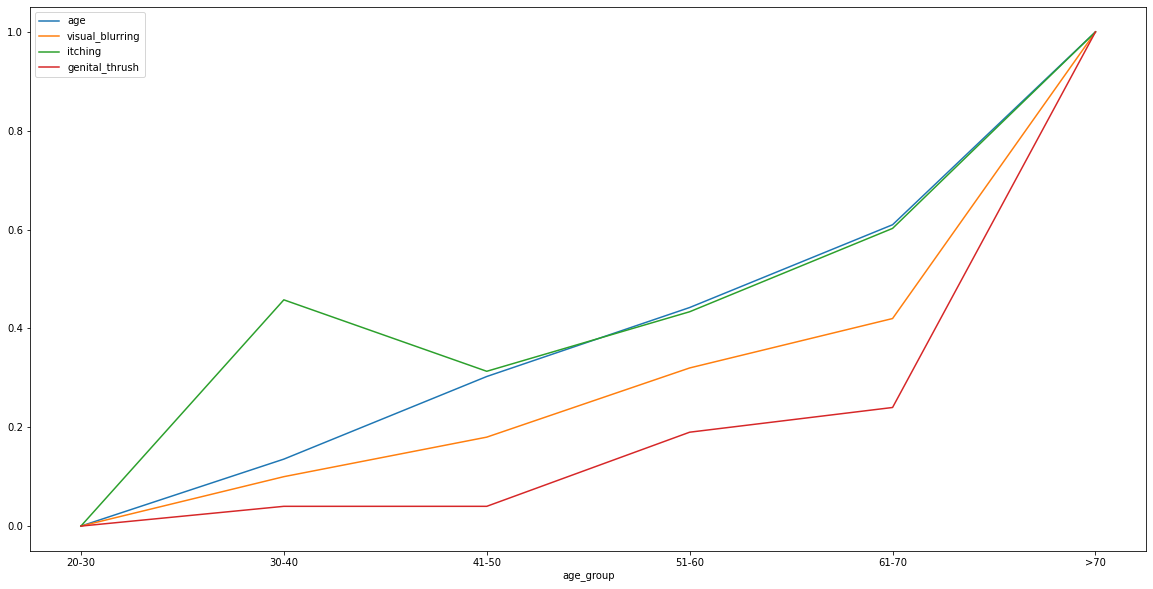

In [26]:
#most seen issues in females vs male
normalized_female_df[["age","visual_blurring","itching","genital_thrush"]].plot(figsize=(20, 10),legend=True)

<AxesSubplot:xlabel='age_group'>

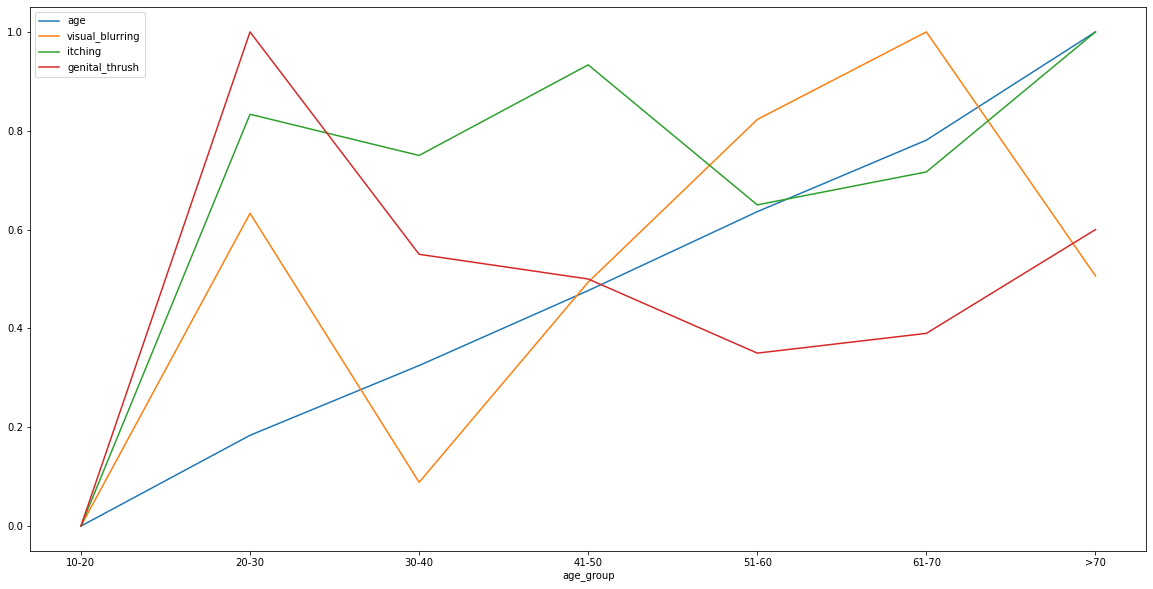

In [27]:
normalized_male_df[["age","visual_blurring","itching","genital_thrush"]].plot(figsize=(20, 10),legend=True)

#### 3. Most common issues in females?
We saw that Visual Blurring, Itching, and Genital Thrush are the medical issues seen in females as their age grows. More Females grow these issues as their age increases. People above 70 are most likely to have all of these. But this is not true in males. Below is the graph of these issues in males